In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [14]:
train, test = mnist.load_data()

In [15]:
xtrn, ytrn = train
xtst, ytst = test

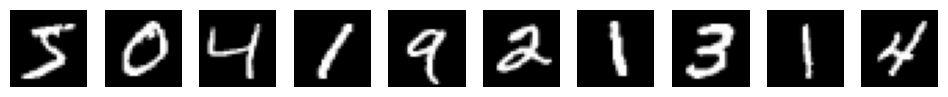

In [16]:
def display_images(images, num_images=10):
    plt.figure(figsize=(12, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

display_images(xtrn)

In [17]:
xtrn_shape = xtrn.shape
ytrn_shape = ytrn.shape
xtst_shape = xtst.shape
ytst_shape = ytst.shape

In [18]:
print("X train shape, y train shape:", xtrn_shape, ytrn_shape)
print("X test shape, y test shape:", xtst_shape, ytst_shape)

X train shape, y train shape: (60000, 28, 28) (60000,)
X test shape, y test shape: (10000, 28, 28) (10000,)


In [19]:
# data preprocessing
xtrn = xtrn.reshape(60000, 28*28).astype(np.float32) / 255.0
xtst = xtst.reshape(10000, 28*28).astype(np.float32) / 255.0

def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

num_classes = 10

ytrn = one_hot_encode(ytrn, num_classes).astype(np.float32)
ytst = one_hot_encode(ytst, num_classes).astype(np.float32)

In [20]:
class Network:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size).astype(np.float32) * 0.01
        self.b1 = np.zeros((1, hidden_size), dtype=np.float32)
        self.W2 = np.random.randn(hidden_size, output_size).astype(np.float32) * 0.01
        self.b2 = np.zeros((1, output_size), dtype=np.float32)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -709, 709)))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def backward(self, X, y, output):
        m = y.shape[0]
        self.dZ2 = output - y
        self.dW2 = np.dot(self.A1.T, self.dZ2) / m
        self.db2 = np.sum(self.dZ2, axis=0, keepdims=True) / m
        self.dZ1 = np.dot(self.dZ2, self.W2.T) * (self.A1 * (1 - self.A1))
        self.dW1 = np.dot(X.T, self.dZ1) / m
        self.db1 = np.sum(self.dZ1, axis=0, keepdims=True) / m

    def update(self, learning_rate):
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2

    def compute_loss(self, y, output):
        m = y.shape[0]
        epsilon = 1e-15
        output = np.clip(output, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y * np.log(output))
        return loss

In [21]:
# Set hyperparameters and initialize the model
learning_rate = 1
num_epochs = 100
hidden_size = 128
output_size = num_classes
input_size = xtrn.shape[1]

xtrn = xtrn.astype(np.float32)
ytrn = ytrn.astype(np.float32)

model = Network(input_size, hidden_size, output_size)

# Train the model
for epoch in range(num_epochs):
    # Forward propagation
    output = model.forward(xtrn)
    loss = model.compute_loss(ytrn, output)

    # Backward propagation
    model.backward(xtrn, ytrn, output)

    # Update parameters
    model.update(learning_rate)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss}')

print("Training terminated successfully.")

Epoch 10/100, Loss: 2.3400734375
Epoch 20/100, Loss: 2.1475119791666666
Epoch 30/100, Loss: 1.70020859375
Epoch 40/100, Loss: 1.2498968750000001
Epoch 50/100, Loss: 0.9646440755208334
Epoch 60/100, Loss: 0.8152734375
Epoch 70/100, Loss: 0.7038111328125001
Epoch 80/100, Loss: 0.6067571614583334
Epoch 90/100, Loss: 0.5493211588541667
Epoch 100/100, Loss: 0.5047377604166667
Training terminated successfully.


In [22]:
output = model.forward(xtst)
loss = model.compute_loss(ytst, output)
print(loss)

0.484234326171875
